# Intrinsic Difference Analysis
The purpose of the master thesis is to infer some parameter of the simulation. This goal of this notebook is to found what's the intrinsic difference between 2 simulations with the same initial parameters. After that, we need to compare this difference with the difference between 2 images with not the same starting parameters to see if there's enough difference (and information) in the image to infer the starting parameter.

In [1]:
import sys

import numpy as np

# Package
from utils import *
import random
from matplotlib import pyplot as plt
import time

# Load data

In [2]:
comparator = Comparator(
    "same_value_study_start=350_interval=100_ndraw=8_size=(64,64)",
        "cell_cycle_study_start=350_interval=100_ndraw=8_size=(64,64)", jupyter=True)

## Mean difference image

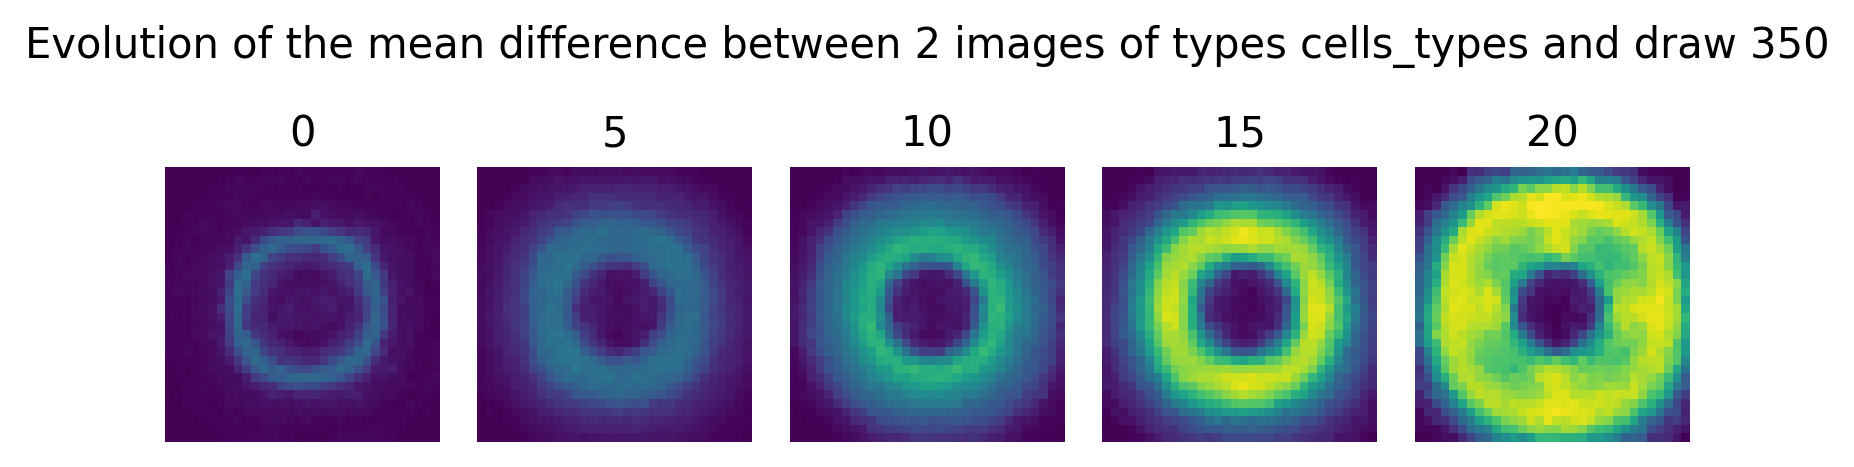

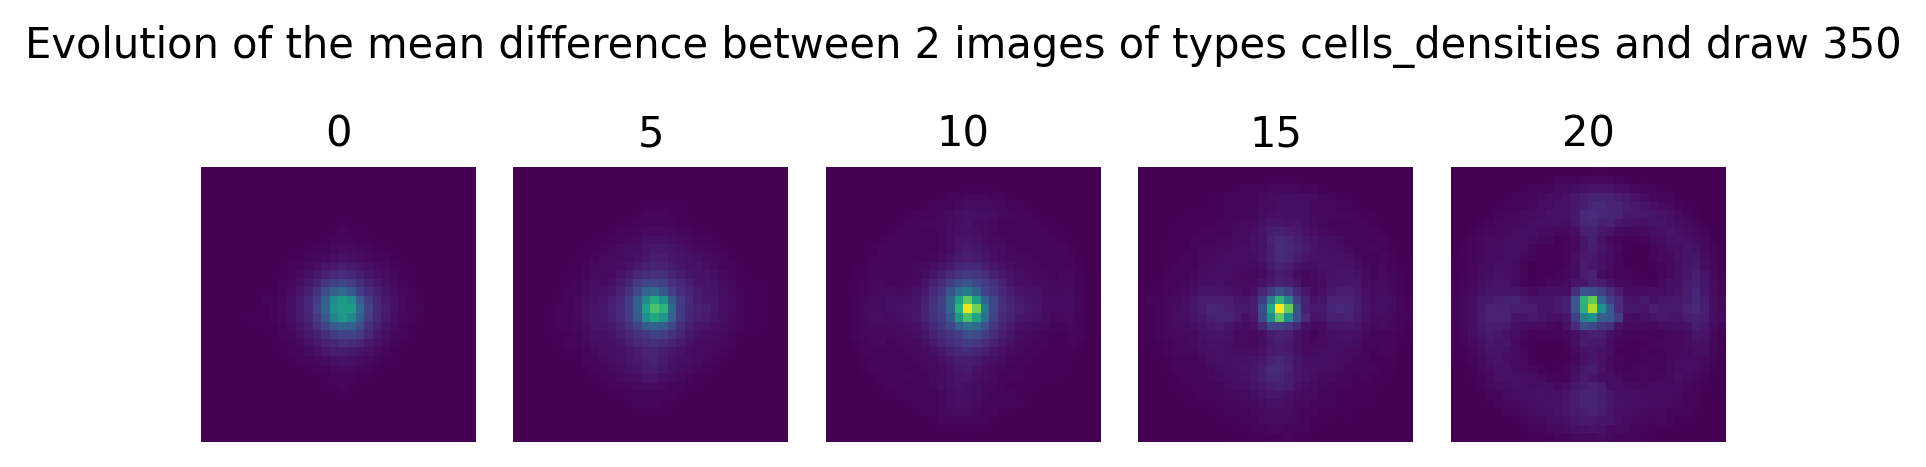

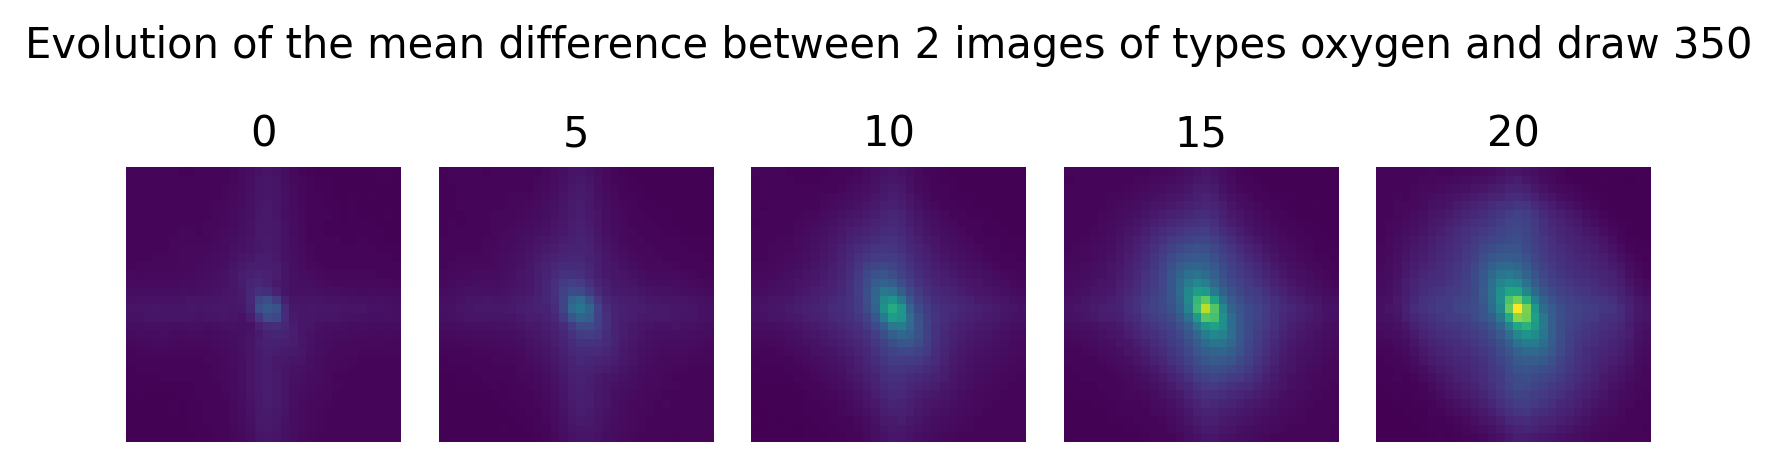

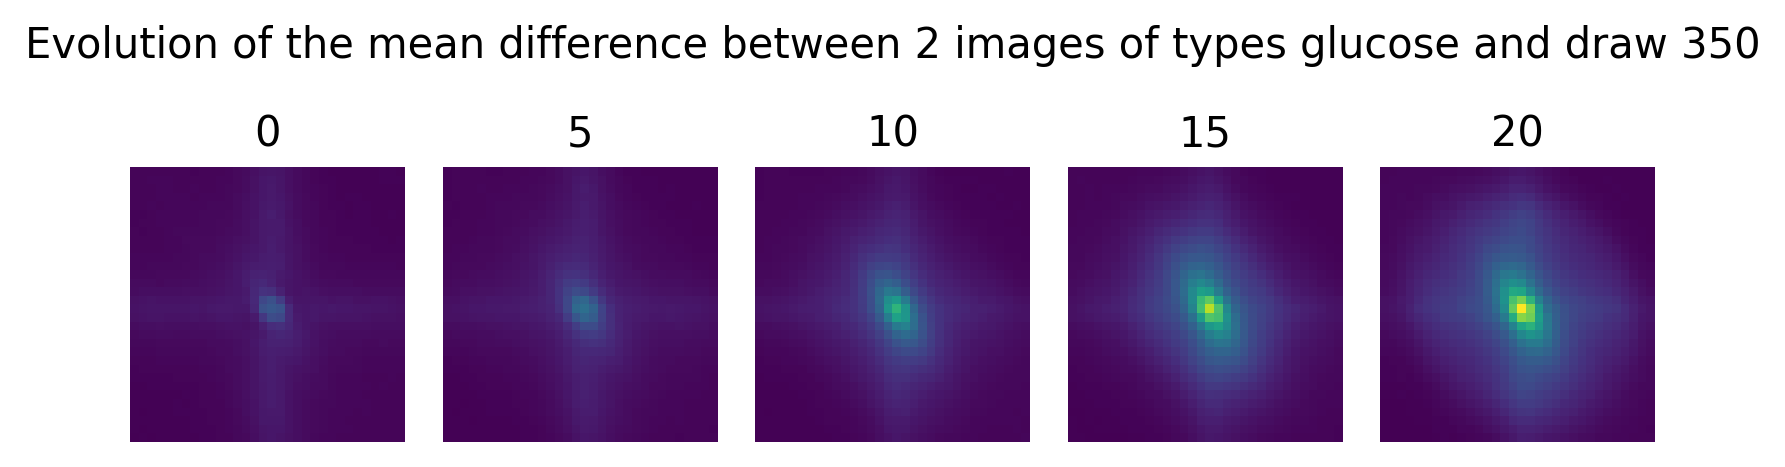

In [7]:
draw = 350
for images_type in ['cells_types', 'cells_densities', 'oxygen', 'glucose']:
    fig, ax = plt.subplots(1,5,dpi=250)
    fig.suptitle(f"Evolution of the mean difference between 2 images of types {images_type} and draw {draw}",y=0.7)
    datas = [comparator.mean_difference(Metric.IMAGE_ABSOLUTE_DIFFERENCE, draw, images_type, "cell_cycle", difference, 0, 12, 1000) for difference in [0,5,10,15,20]]
    v_min = np.min(datas)
    v_max = np.max(datas)
    for index, difference in enumerate([0,5,10,15,20]):
        ax[index].set_title(f"{difference}")
        ax[index].imshow(datas[index], vmin=v_min, vmax=v_max)
        ax[index].axis('off')
    plt.tight_layout()
    plt.savefig(f"Evolution of the mean difference between 2 images of types {images_type}.png", dpi=150,bbox_inches='tight')
    plt.show()

## Mean difference metrics

### First metric: Histogram Correlation (between -1 and 1)
$$\text{Histogram Correlation}(X,Y)=corr(histogram(X),histogram(Y))$$

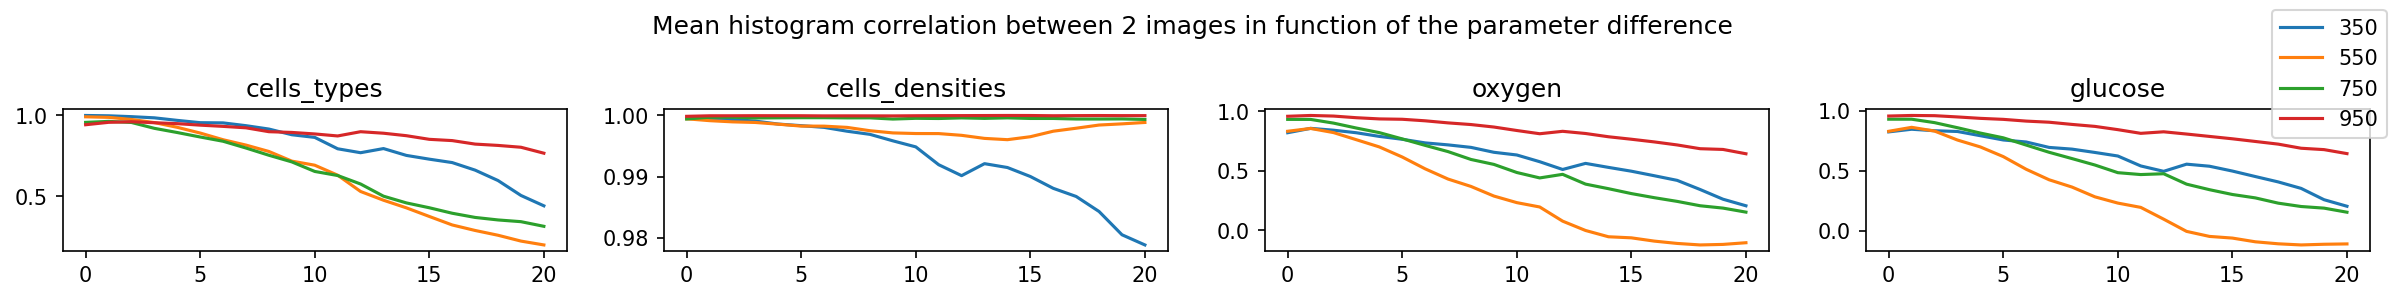

In [8]:
fig, ax = plt.subplots(1,4, dpi=150, figsize=(16,2))
fig.suptitle("Mean histogram correlation between 2 images in function of the parameter difference")
for index, images_type in enumerate(['cells_types', 'cells_densities', 'oxygen', 'glucose']):
    X = range(0,21)
    for draw in [350, 550, 750, 950]:
        Y = [comparator.mean_difference(Metric.CORRELATION_HISTOGRAM, draw, images_type, "cell_cycle", diff, 0, 12, 1000) for diff in X]
        if index == 3:
            ax[index].plot(X,Y,label=draw)
        else:
            ax[index].plot(X,Y)
    ax[index].set_title(f"{images_type}")
fig.tight_layout()
fig.legend()
plt.savefig("Mean histogram correlation between 2 images in function of the parameter difference.png", dpi=150,bbox_inches='tight')
plt.show()

### Second metric: SSIM (Structural Similarity Index Measure) (between -1 and 1)
$$SSIM(X,Y)$$
[[https://en.wikipedia.org/wiki/Structural_similarity_index_measure]]

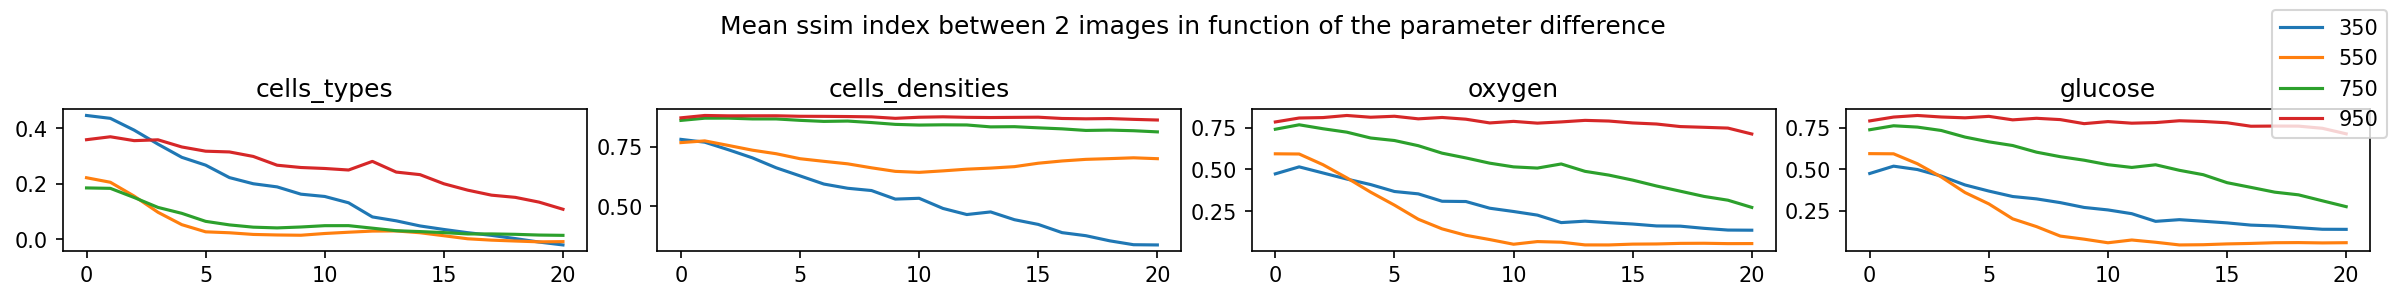

In [9]:
fig, ax = plt.subplots(1,4, dpi=150, figsize=(16,2))
fig.suptitle("Mean ssim index between 2 images in function of the parameter difference")
for index, images_type in enumerate(['cells_types', 'cells_densities', 'oxygen', 'glucose']):
    X = range(0,21)
    for draw in [350, 550, 750, 950]:
        Y = [comparator.mean_difference(Metric.SSIM, draw, images_type, "cell_cycle", diff, 0, 12, 1000) for diff in X]
        if index == 3:
            ax[index].plot(X,Y,label=draw)
        else:
            ax[index].plot(X,Y)
    ax[index].set_title(f"{images_type}")
fig.tight_layout()
fig.legend()
plt.savefig("Mean ssim index between 2 images in function of the parameter difference.png", dpi=150,bbox_inches='tight')
plt.show()

### Third metric: Mean Absolute Error 
$$d_1(X,Y) = \left\| X-Y \right\|_{1} \sim MAE(X,Y)=\frac{1}{Height\cdot Width}\sum_{i}\sum_{j}\left| X_{ij}-Y_{ij} \right|$$
[[https://math.stackexchange.com/questions/507742/distance-similarity-between-two-matrices]]

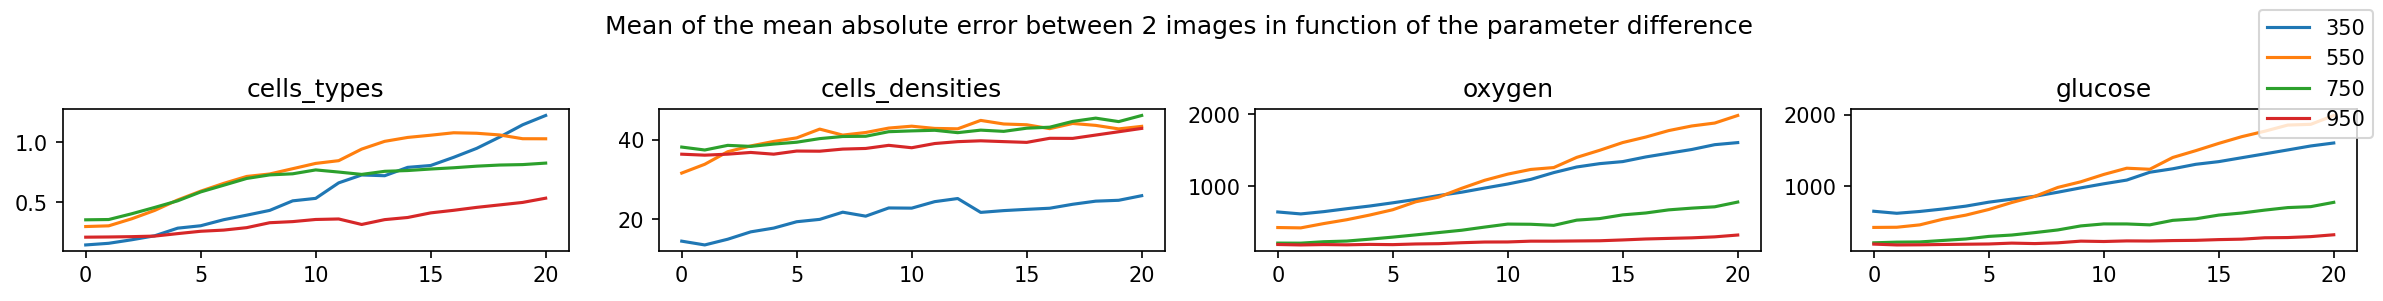

In [10]:
fig, ax = plt.subplots(1,4, dpi=150, figsize=(16,2))
fig.suptitle("Mean of the mean absolute error between 2 images in function of the parameter difference")
for index, images_type in enumerate(['cells_types', 'cells_densities', 'oxygen', 'glucose']):
    X = range(0,21)
    for draw in [350, 550, 750, 950]:
        Y = [comparator.mean_difference(Metric.MEAN_ABSOLUTE_ERROR, draw, images_type, "cell_cycle", diff, 0, 12, 1000) for diff in X]
        if index == 3:
            ax[index].plot(X,Y,label=draw)
        else:
            ax[index].plot(X,Y)
    ax[index].set_title(f"{images_type}")
fig.tight_layout()
fig.legend()
plt.savefig("Mean of the mean absolute error between 2 images in function of the parameter difference.png", dpi=150,bbox_inches='tight')
plt.show()

### Fourth metric: Root Mean Squared Error (RMSE) 
$$d_2(X,Y) = \left\| X-Y \right\|_{2} \sim RMSE(X,Y)= \sqrt{\frac{1}{Height\cdot Width}\sum_{i}\sum_{j}\left( X_{ij}-Y_{ij} \right)^{2} }$$
[[https://math.stackexchange.com/questions/507742/distance-similarity-between-two-matrices]]

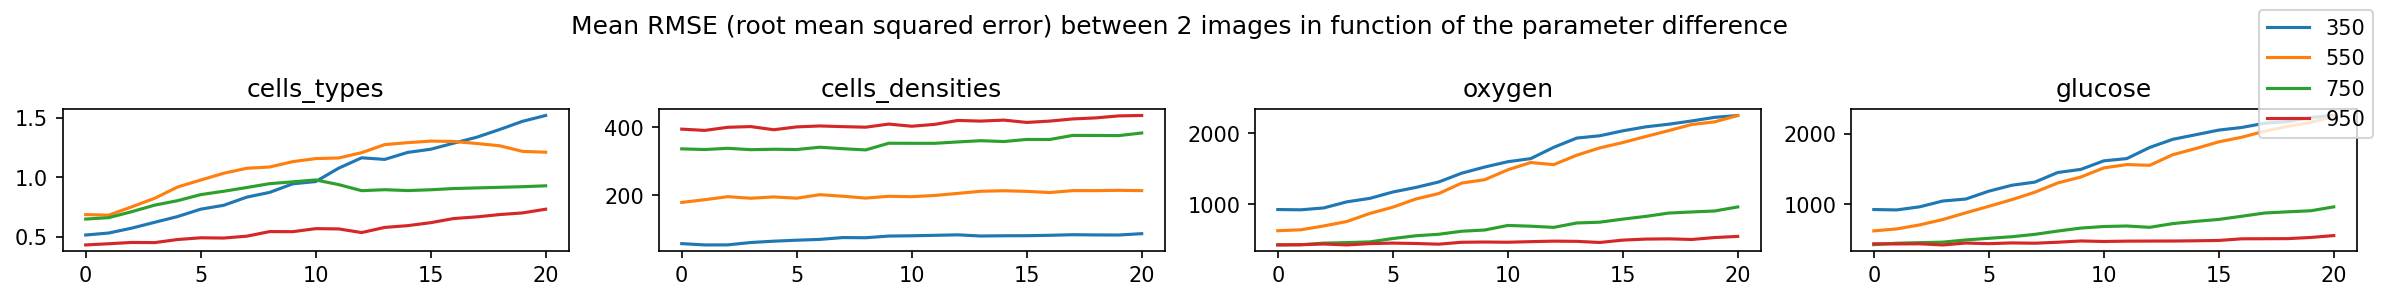

In [11]:
fig, ax = plt.subplots(1,4, dpi=150, figsize=(16,2))
fig.suptitle("Mean RMSE (root mean squared error) between 2 images in function of the parameter difference")
for index, images_type in enumerate(['cells_types', 'cells_densities', 'oxygen', 'glucose']):
    X = range(0,21)
    for draw in [350, 550, 750, 950]:
        Y = [comparator.mean_difference(Metric.ROOT_MEAN_ABSOLUTE_ERROR, draw, images_type, "cell_cycle", diff, 0, 12, 1000) for diff in X]
        if index == 3:
            ax[index].plot(X,Y,label=draw)
        else:
            ax[index].plot(X,Y)
    ax[index].set_title(f"{images_type}")
fig.tight_layout()
fig.legend()
plt.savefig("Mean RMSE (root mean squared error) between 2 images in function of the parameter difference.png", dpi=150,bbox_inches='tight')
plt.show()

### Fifth metric: Max Absolute Error
$$d_\infty (X,Y) = \left\| X-Y \right\|_{\infty } \sim MaxAE(X-Y)=\max(X-Y)$$
[[https://math.stackexchange.com/questions/507742/distance-similarity-between-two-matrices]]

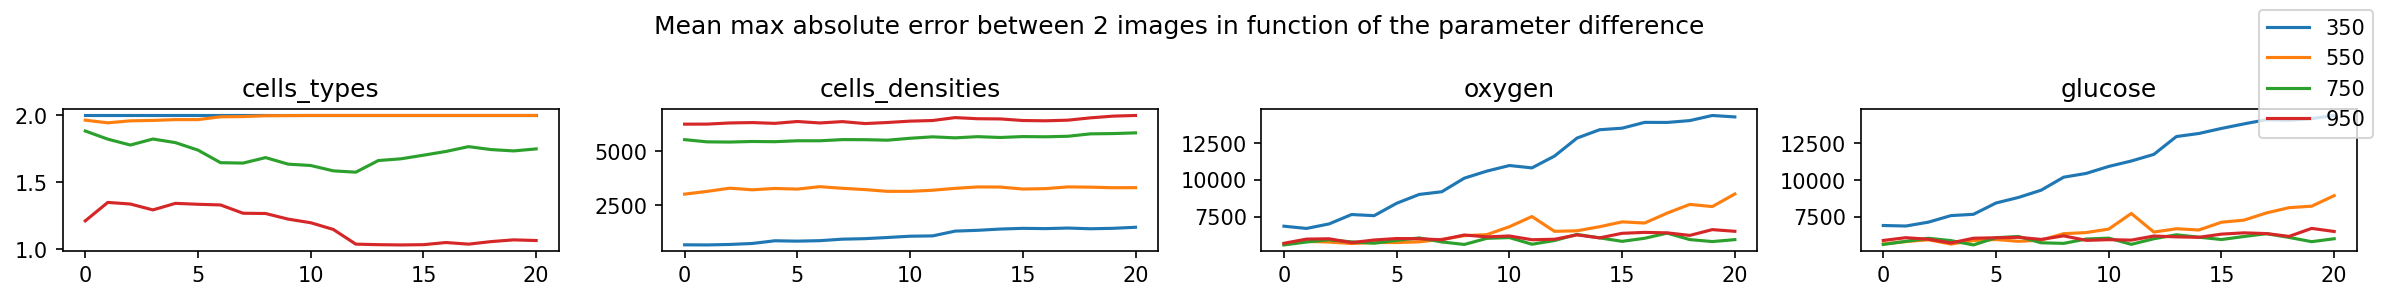

In [12]:
fig, ax = plt.subplots(1,4, dpi=150, figsize=(16,2))
fig.suptitle("Mean max absolute error between 2 images in function of the parameter difference")
for index, images_type in enumerate(['cells_types', 'cells_densities', 'oxygen', 'glucose']):
    X = range(0,21)
    for draw in [350, 550, 750, 950]:
        Y = [comparator.mean_difference(Metric.MAX_ABSOLUTE_ERROR, draw, images_type, "cell_cycle", diff, 0, 12, 1000) for diff in X]
        if index == 3:
            ax[index].plot(X,Y,label=draw)
        else:
            ax[index].plot(X,Y)
    ax[index].set_title(f"{images_type}")
fig.tight_layout()
fig.legend()
plt.savefig("Mean max absolute error between 2 images in function of the parameter difference.png", dpi=150,bbox_inches='tight')
plt.show()